In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [8]:

df = pd.read_csv('C:\\Users\\emret\\OneDrive\\Masaüstü\\Masaüstü\\games.csv') 

In [9]:
df.head  
#This is the sample of how to extract data from kaggle or any other similar website and how to use the extractad data effectively.There are examples of method which can be used to be able examine the datas in different ways.
#Also this code contain that study for chess because there are data from lichess and we will inspect the matches and results according to the game types.

/
/
/


#Lichess internet sitesindeki verileri çekerek hem oynanan maçların analizini yaptım.Hem de bir kişinin satranç çaışmasını ve oyununu geliştrebilmesi için bir uygulama yaptım
#Burada lichess üzerinde oynanan satranç oyunlarının verileri mevcut.

<bound method NDFrame.head of              id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code       white_id  white_rating 

In [70]:
df.head(10)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [80]:
df['winner'].head(10)

0    white
1    black
2    white
3    white
4    white
5     draw
6    white
7    black
8    black
9    white
Name: winner, dtype: object

In [72]:
df.shape

(20058, 16)

In [73]:
df.info(max_cols = len(df)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [66]:
chess_df_times = df[['created_at', 'last_move_at']].copy()  #Bu kod, bir DataFrame'deki "created_at" ve "last_move_at" sütunlarını seçer ve bu sütunlardaki zaman bilgilerini Unix zaman damgalarından uygun bir tarih ve saat formata dönüştürerek yeni sütunlara ekler.

chess_df_times['created_at_dt'] = pd.to_datetime(chess_df_times['created_at']/1000,
                                          unit = 's',
                                          origin = 'unix')

chess_df_times['last_move_at_dt'] = pd.to_datetime(chess_df_times['last_move_at']/1000,
                                          unit = 's',
                                          origin = 'unix')

chess_df_times.head(10)

,created_at,last_move_at,created_at_dt,last_move_at_dt
0,1.504210e+12,1.504210e+12,2017-08-31 20:06:40,2017-08-31 20:06:40
1,1.504130e+12,1.504130e+12,2017-08-30 21:53:20,2017-08-30 21:53:20
2,1.504130e+12,1.504130e+12,2017-08-30 21:53:20,2017-08-30 21:53:20
3,1.504110e+12,1.504110e+12,2017-08-30 16:20:00,2017-08-30 16:20:00
4,1.504030e+12,1.504030e+12,2017-08-29 18:06:40,2017-08-29 18:06:40
5,1.504240e+12,1.504240e+12,2017-09-01 04:26:40,2017-09-01 04:26:40
6,1.504230e+12,1.504230e+12,2017-09-01 01:40:00,2017-09-01 01:40:00
7,1.503680e+12,1.503680e+12,2017-08-25 16:53:20,2017-08-25 16:53:20
8,1.503510e+12,1.503510e+12,2017-08-23 17:40:00,2017-08-23 17:40:00
9,1.503440e+12,1.503440e+12,2017-08-22 22:13:20,2017-08-22 22:13:20


In [74]:
df.describe

<bound method NDFrame.describe of              id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code       white_id  white_rat

In [85]:
def OpeningName()

I have created openning guide.You can enter the notations (moves) of your match and see the details of your game.





/
/
/
/
:#Açılış kütüphanesinden yararlanarak bir açılış rehberi oluşturdum.Kendiniz maç yaptıktan sonra hamlelerinizi yazabilir ve oynadığınız açılışın ismini
  #ve nasıl devam ettiğini öğrenebilrsiniz
  #Eğer girdiğiniz açılış veri setinde yoksa çok doğru olmadığı yorumunu yapabilirsiniz.Çünkü yüksek reytingli oyuncuların verileri alınmıştır.
  Notation= str (input ("Enter the moves of the match that you want to study") ) 
  bool_series = df["moves"].str.startswith(Notation, na = False)
  print (df.opening_name[bool_series])
OpeningName()
  

14                    Four Knights Game: Italian Variation
15       Italian Game: Two Knights Defense |  Knight At...
16                    Four Knights Game: Italian Variation
17                    Four Knights Game: Italian Variation
20                  Italian Game: Anti-Fried Liver Defense
                               ...                        
20012    Italian Game: Classical Variation |  Greco Gambit
20013                        Ruy Lopez: Fianchetto Defense
20014    Italian Game: Classical Variation |  Greco Gam...
20017    Italian Game: Two Knights Defense |  Steinitz ...
20039              Italian Game: Evans Gambit |  Main Line
Name: opening_name, Length: 2759, dtype: object


In [12]:
df["winner"]

0        white
1        black
2        white
3        white
4        white
         ...  
20053    white
20054    black
20055    white
20056    white
20057    black
Name: winner, Length: 20058, dtype: object

In [13]:
df.loc[df.winner=="white"]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20050,nYOvevdh,True,1.499814e+12,1.499814e+12,9,outoftime,white,10+0,jamboger,1243,yamaguchipolgar,1142,c4 e5 d4 exd4 Qxd4 Nf6 Bg5 Be7 e4,A20,English Opening: King's English Variation,2
20052,EopEqqAa,True,1.499812e+12,1.499812e+12,37,resign,white,10+10,jamboger,1219,samael88,1250,c4 e6 d4 b6 Nc3 Bb7 Nf3 g6 h4 Bg7 Bg5 f6 Bf4 d...,A40,English Defense,4
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3


There are 1000 rows and 16 columns


C:\Users\emret\AppData\Local\Temp\ipykernel_10840\1254571674.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
C:\Users\emret\AppData\Local\Temp\ipykernel_10840\1254571674.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


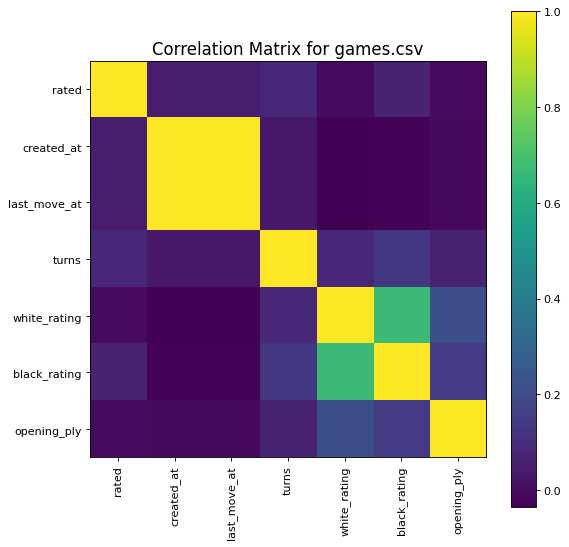

In [81]:
def plotCorrelationMatrix(df, graphWidth): 
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    # Scatter and density plots

    
nRowsRead = 1000 # specify 'None' if want to read whole file

df1 = pd.read_csv('C:/Users/emret/OneDrive/Masaüstü/Masaüstü/games.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'games.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
#plotPerColumnDistribution(df1, 10, 5)
plotCorrelationMatrix(df1, 8)


array([[<AxesSubplot: title={'center': 'black_rating'}>,
        <AxesSubplot: title={'center': 'white_rating'}>],
       [<AxesSubplot: title={'center': 'turns'}>,
        <AxesSubplot: title={'center': 'opening_ply'}>],
       [<AxesSubplot: title={'center': 'created_at'}>,
        <AxesSubplot: title={'center': 'last_move_at'}>]], dtype=object)

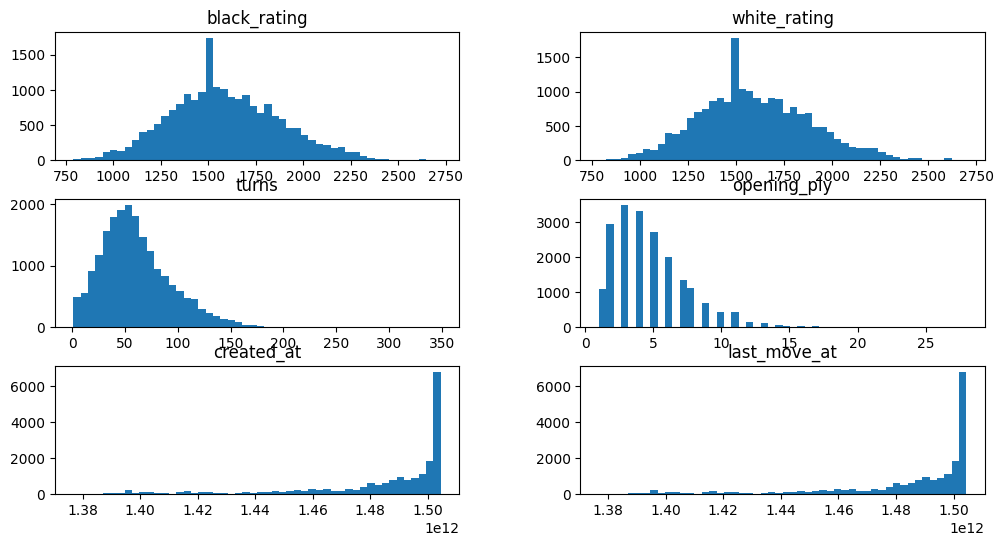

In [15]:
df[['black_rating', 'white_rating', 'turns', 'opening_ply', 'created_at', 'last_move_at']].hist(figsize=(12, 6), bins=50, grid=False) 

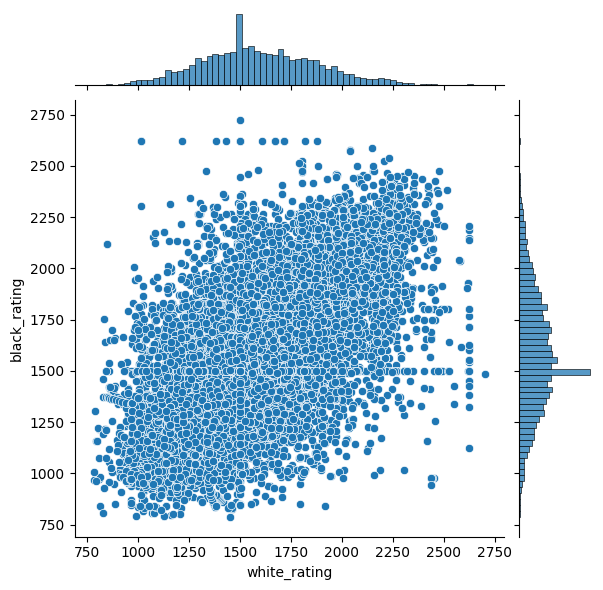

In [75]:
sns.jointplot(x='white_rating',y='black_rating',data=df,kind='scatter') 

In [104]:
df.corr() 

C:\Users\emret\AppData\Local\Temp\ipykernel_2440\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rated,created_at,last_move_at,turns,winner,white_rating,black_rating,opening_ply
rated,1.000000,-0.001171,-0.001176,0.090698,-0.006722,0.003284,0.032655,-0.001906
created_at,-0.001171,1.000000,1.000000,0.083185,-0.019503,0.116170,0.133316,0.100201
last_move_at,-0.001176,1.000000,1.000000,0.083196,-0.019503,0.116172,0.133318,0.100203
turns,0.090698,0.083185,0.083196,1.000000,-0.044346,0.129753,0.160467,0.055999
winner,-0.006722,-0.019503,-0.019503,-0.044346,1.000000,0.141700,-0.166815,0.020669
white_rating,0.003284,0.116170,0.116172,0.129753,0.141700,1.000000,0.634171,0.277379
black_rating,0.032655,0.133316,0.133318,0.160467,-0.166815,0.634171,1.000000,0.255396
opening_ply,-0.001906,0.100201,0.100203,0.055999,0.020669,0.277379,0.255396,1.000000


C:\Users\emret\AppData\Local\Temp\ipykernel_2440\3875853477.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()) #Oyunların öğreticiliğini gösteren ikinci bir hata matrisi


<AxesSubplot: >

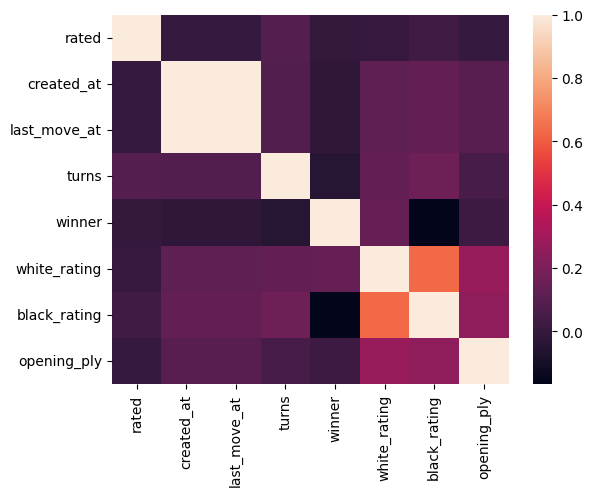

In [119]:
sns.heatmap(df.corr()) 

C:\Users\emret\AppData\Local\Temp\ipykernel_2440\3997901759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


<AxesSubplot: >

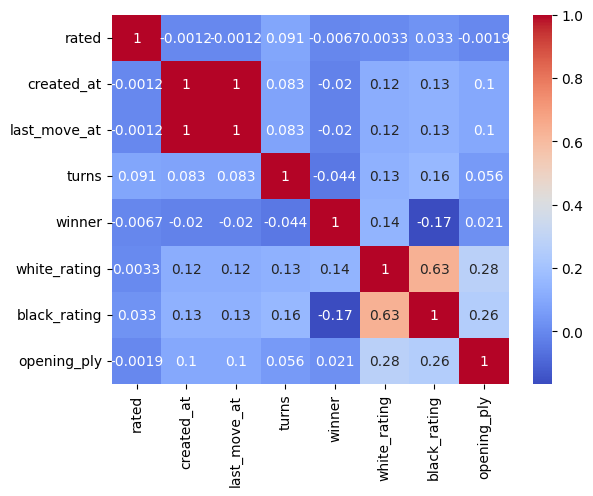

In [111]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [18]:
num_var =[col for col in df.columns if df[col].dtype !='0'] 

In [19]:
num_var 

['id',
 'rated',
 'created_at',
 'last_move_at',
 'turns',
 'victory_status',
 'winner',
 'increment_code',
 'white_id',
 'white_rating',
 'black_id',
 'black_rating',
 'moves',
 'opening_eco',
 'opening_name',
 'opening_ply']

In [20]:
desc_agg=['sum','mean','std','var','min','max']

In [21]:
desc_agg

['sum', 'mean', 'std', 'var', 'min', 'max']

In [22]:
desc_agg_dict= {col:desc_agg for col in df.columns}

In [23]:
desc_agg_dict

{'id': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'rated': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'created_at': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'last_move_at': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'turns': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'victory_status': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'winner': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'increment_code': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'white_id': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'white_rating': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'black_id': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'black_rating': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'moves': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'opening_eco': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'opening_name': ['sum', 'mean', 'std', 'var', 'min', 'max'],
 'opening_ply': ['sum', 'mean', 'std', 'var', 'min', 'max']}

In [24]:
df.shape

(20058, 16)

In [26]:
df.corr() #

C:\Users\emret\AppData\Local\Temp\ipykernel_10840\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
rated,1.000000,-0.001171,-0.001176,0.090698,0.003284,0.032655,-0.001906
created_at,-0.001171,1.000000,1.000000,0.083185,0.116170,0.133316,0.100201
last_move_at,-0.001176,1.000000,1.000000,0.083196,0.116172,0.133318,0.100203
turns,0.090698,0.083185,0.083196,1.000000,0.129753,0.160467,0.055999
white_rating,0.003284,0.116170,0.116172,0.129753,1.000000,0.634171,0.277379
black_rating,0.032655,0.133316,0.133318,0.160467,0.634171,1.000000,0.255396
opening_ply,-0.001906,0.100201,0.100203,0.055999,0.277379,0.255396,1.000000


C:\Users\emret\AppData\Local\Temp\ipykernel_10840\1322686933.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.5,fmt='.1f',ax=ax) # annot karelerin uzerindeki degerleri gosterir


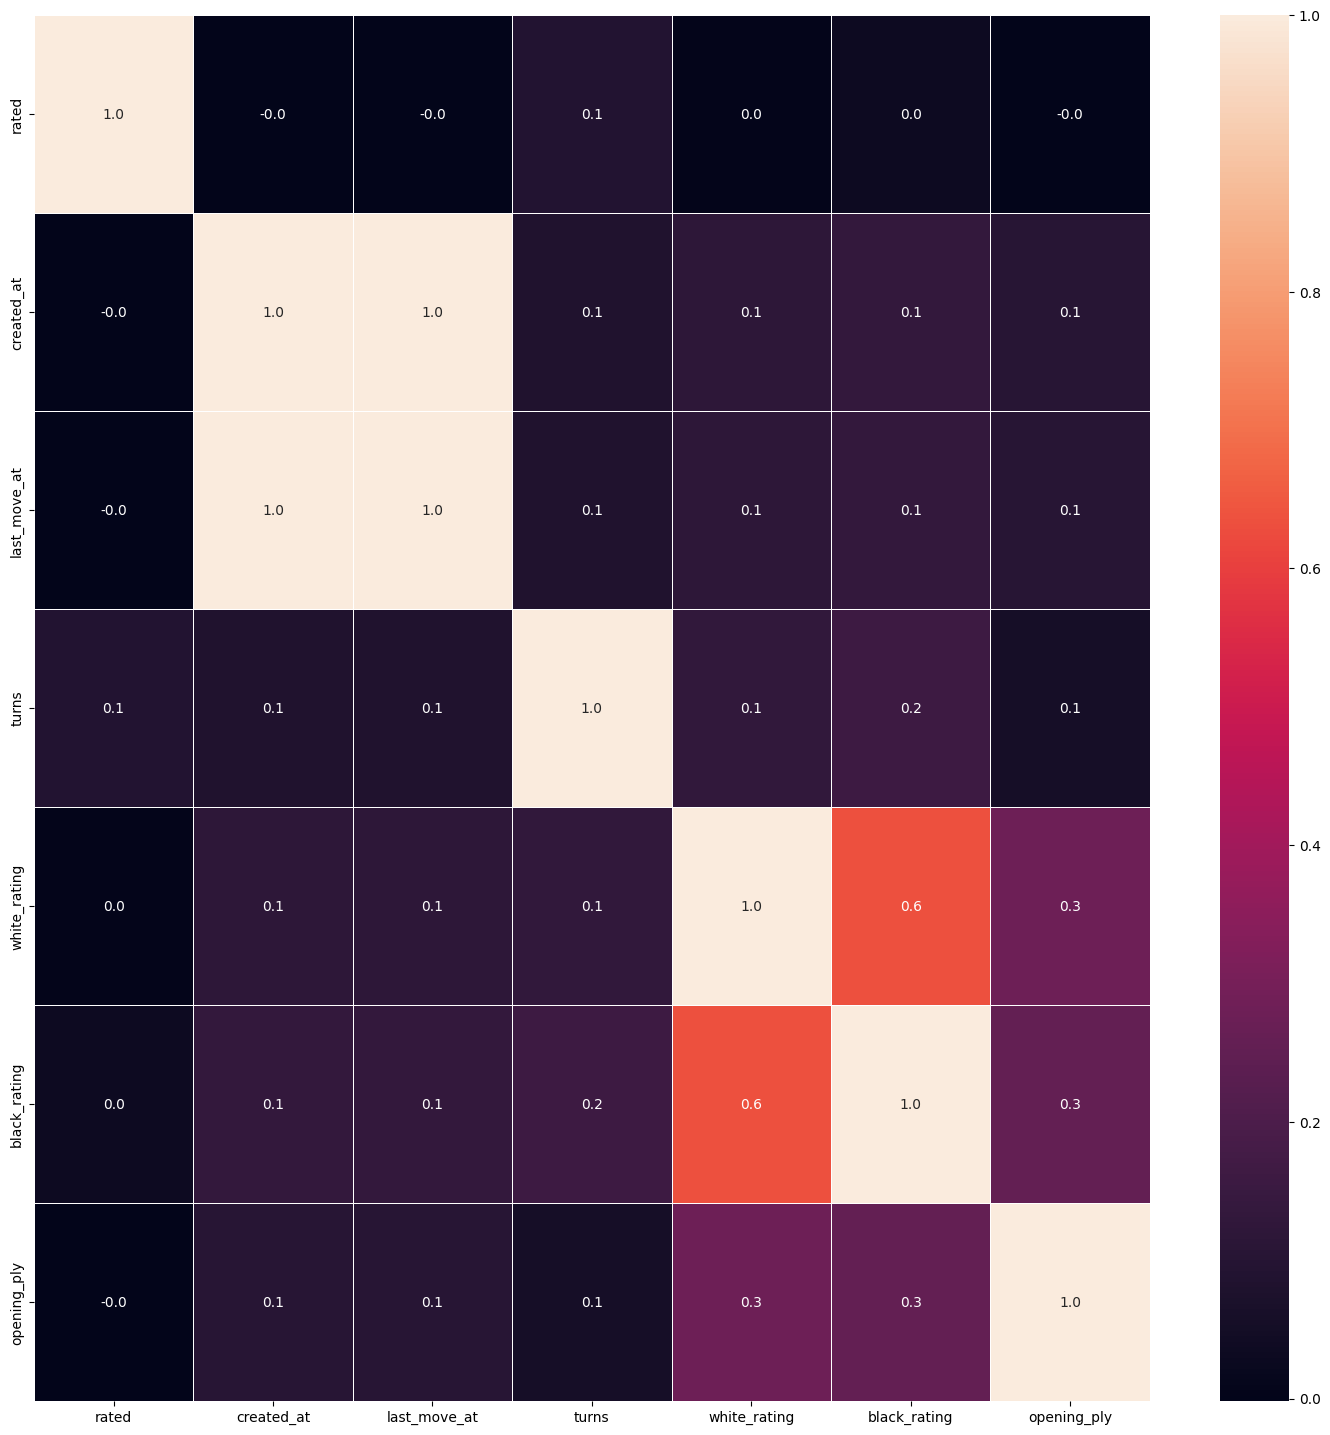

In [28]:
f,ax = plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(), annot=True, linewidths=.5,fmt='.1f',ax=ax) 
plt.show()                                                         

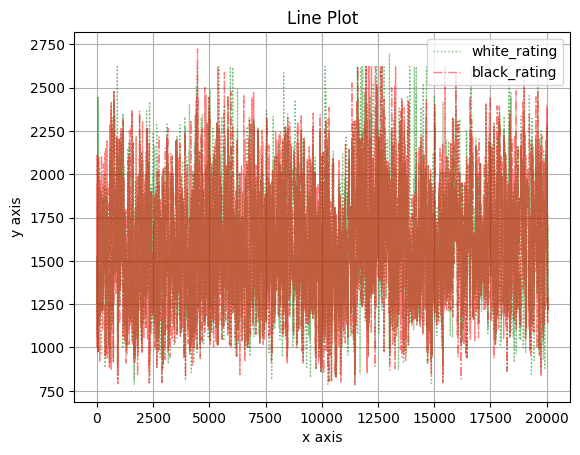

In [29]:
df.white_rating.plot(kind = 'line',color = 'g', label = 'white_rating', linewidth =1, alpha = 0.5, grid = True, linestyle = ':')
df.black_rating.plot(color = 'r', label ='black_rating', linewidth = 1, alpha = 0.5, grid = True,linestyle = '-.')
plt.legend(loc = 'upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')
plt.show()

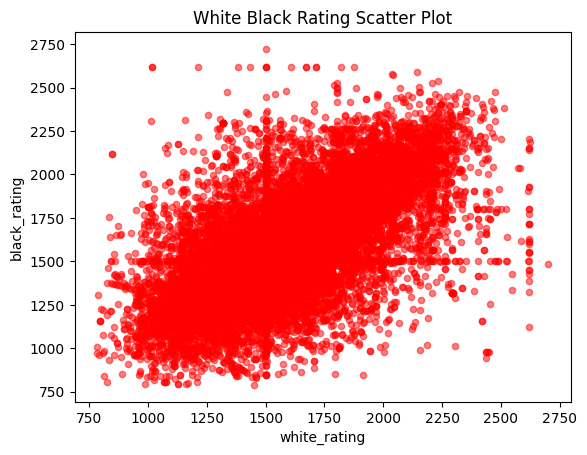

In [31]:
df.plot(kind = 'scatter', x = 'white_rating', y= 'black_rating', alpha = 0.5, color = 'red')
plt.xlabel('white_rating')
plt.ylabel('black_rating')
plt.title('White Black Rating Scatter Plot')
plt.show()

In [35]:
x = df['winner']=="draw"
#y = df['black_rating']>2000
b=x
#a = x&y
df[b]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
40,R9a2DLwe,False,1.499700e+12,1.499700e+12,32,draw,draw,20+25,white_queen_1990,1207,shivangithegenius,978,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 Bg5 Bg7 B...,B70,Sicilian Defense: Dragon Variation,10
98,h1unxHlo,True,1.504200e+12,1.504200e+12,113,draw,draw,15+0,avelez8,1745,anonymous1705,1714,d4 d5 c4 Nf6 Nc3 Bf5 Bf4 a6 Nf3 e6 a3 Nc6 e3 B...,D06,Queen's Gambit Refused: Marshall Defense,4
126,gHld9WSr,True,1.503910e+12,1.503910e+12,120,draw,draw,15+15,sureka_akshat,1139,sassou,1212,e4 Nf6 Nc3 e5 Nf3 Nc6 Bc4 Bc5 O-O O-O d3 d6 h3...,C50,Four Knights Game: Italian Variation,8
143,PLxCc87r,True,1.503090e+12,1.503090e+12,12,draw,draw,15+15,sassou,1215,lumipa,1219,e4 e5 Nf3 Nc6 Bc4 Qe7 d3 Nf6 Bg5 h6 Bxf6 Qxf6,C50,Italian Game,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20003,d9X08Sof,True,1.504210e+12,1.504216e+12,103,draw,draw,30+30,moistvonlipwig,2283,chess4life,2358,e4 c5 Nc3 e6 f4 d5 Nf3 dxe4 Nxe4 Nc6 b3 Nf6 Bd...,B23,Sicilian Defense: Closed,4
20004,Svkerj5v,True,1.503257e+12,1.503264e+12,109,draw,draw,30+30,god666,2214,moistvonlipwig,2286,f4 d5 Nf3 Nf6 e3 g6 Be2 Bg7 O-O O-O b3 Ne4 Ne5...,A03,Bird Opening: Dutch Variation,2
20011,gptZOHi9,True,1.500156e+12,1.500161e+12,63,draw,draw,45+45,moistvonlipwig,2239,atrophied,2401,e4 c5 Nc3 Nc6 f4 g6 Nf3 Bg7 Bb5 Nd4 O-O Nxb5 N...,B23,Sicilian Defense: Grand Prix Attack,5
20014,ZhZm1ol9,True,1.498871e+12,1.498879e+12,109,draw,draw,45+45,moistvonlipwig,2229,mn8,2220,e4 e5 Nf3 Nc6 Bc4 Bc5 c3 Nf6 d4 exd4 cxd4 Bb4+...,C54,Italian Game: Classical Variation | Greco Gam...,17


In [ ]:
df[np.logical_and(df['white_rating']>2200, df['black_rating']>2200 )]

In [38]:
for index,value in df[['black_rating']][0:3].iterrows():
    print(index," : ",value)

0  :  black_rating    1191
Name: 0, dtype: int64
1  :  black_rating    1261
Name: 1, dtype: int64
2  :  black_rating    1500
Name: 2, dtype: int64


In [39]:
desc_summv2 = df.describe().T 

In [40]:
desc_summv2

,count,mean,std,min,25%,50%,75%,max
created_at,20058.0,1.483617e+12,2.850151e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504493e+12
last_move_at,20058.0,1.483618e+12,2.850140e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504494e+12
turns,20058.0,6.046600e+01,3.357058e+01,1.000000e+00,3.700000e+01,5.500000e+01,7.900000e+01,3.490000e+02
white_rating,20058.0,1.596632e+03,2.912534e+02,7.840000e+02,1.398000e+03,1.567000e+03,1.793000e+03,2.700000e+03
black_rating,20058.0,1.588832e+03,2.910361e+02,7.890000e+02,1.391000e+03,1.562000e+03,1.784000e+03,2.723000e+03
opening_ply,20058.0,4.816981e+00,2.797152e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,2.800000e+01


In [53]:
sensor=df.iloc[:,2:10] 

In [54]:
sensor

,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating
0,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500
1,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322
2,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496
3,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439
4,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523
...,...,...,...,...,...,...,...,...
20053,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691
20054,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233
20055,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219
20056,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360


In [55]:
df_A=np.array((df))

In [56]:
df_A

array([['TZJHLljE', False, 1504210000000.0, ..., 'D10',
        'Slav Defense: Exchange Variation', 5],
       ['l1NXvwaE', True, 1504130000000.0, ..., 'B00',
        'Nimzowitsch Defense: Kennedy Variation', 4],
       ['mIICvQHh', True, 1504130000000.0, ..., 'C20',
        "King's Pawn Game: Leonardis Variation", 3],
       ...,
       ['yrAas0Kj', True, 1499697877493.0, ..., 'D00',
        "Queen's Pawn Game: Mason Attack", 3],
       ['b0v4tRyF', True, 1499696127019.0, ..., 'B07', 'Pirc Defense', 4],
       ['N8G2JHGG', True, 1499643152649.0, ..., 'D00',
        "Queen's Pawn Game: Mason Attack", 3]], dtype=object)